# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### **Equipo:**

- Pía Antiquera.
- Evelyn Silva.


### **Link de repositorio de GitHub:** `https://github.com/piaantiquera/Courses-MDS7202.git`


### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?



**Respuestas**

1.

Apache Spark es un sistema de procesamiento distribuido de código abierto que se utiliza para grandes volumenes de datos. Utiliza el almacenamiento en caché de memoria y una ejecución de consulta optimizada para consultas rápidas de análisis de cualquier tamaño.

Sus principales ventajas sobre pandas es que permite el procesamiento de grandes volumenes de datos de manera distribuida y escalable lo que da paso a algunas ventajas claves sobre pandas, tales como tolerancia al fallo, procesamiento en tiempo real o analítica sql.

----------------------------
2.

RDD en Spark significa Resilient Distributed Dataset y representa una colección distribuida e inmutable de elementos que pueden ser operados en paralelo de fora eficiente, distribuyendo los datos a traves de un cluster y procesandolos en paralelo. Algunas de las caracteristicas principales de los RDD son los ya mencionados anteriormente además de ser resilientes, inmutables y distribuidos.

Los dataframes son un enfoque reciente de la manipulación de los datos, consisten en abstracciones a nivel superior de los RDD donde se ofrece una interaz mas amable y optimizaciones automaticamente lo que hace los hace mas facil e intuitivos de usar basandose en el concepto de RDD.

----------------------------

3.

Las transformaciones y las acciones son dos tipos de operaciones que se utilizan para procesar conjuntos de datos distribuidos en clústeres.

Las transformaciones son operaciones que toman un conjunto de datos (dataframe) como entrada y producen otro conjunto de datos (dataframe) como salida, aprovechando la inmutabilidad de dataframes en spark. No realizan ningún cálculo real hasta que se ejecuta una acción, son "perezosas" ya que no se ejecutan inmediatamente después de llamarlas, sino que se acumulan en un grafo dirigido; el grafo de transformaciones (DAG).

Algunos ejemplos son el uso de orderBy(), groupBy(), filter(), select() o join().


Por otro lado, las acciones son operaciones que desencadenan la ejecución real de la transformación acumulada y devuelven un resultado al controlador o realizan alguna operación que afecte al almacenamiento de datos, provocan que las transformaciones "perezosas" se evalúen y ejecuten en el clúster.

Algunos ejemplos son el uso de show(), take(), count(), collect() o save().

Internamente, cuando se ejecuta una acción, dado que spark funciona bajo "lazy evaluation", las operaciones de transformación se planifican y almacenan sin ejecutarse inmediatamente. Esta evaluación perezosa permite optimizar el plan de ejecución de las queries, encadenando transformaciones y manteniendo un linaje de los datos para proporcionar tolerancia a fallos.


--------------------------------
4.

El particionamiento de datos es clave para optimizar el rendimiento, ya que promueve el paralelismo. Al distribuir los datos en segmentos o particiones, se facilita que los ejecutores procesen datos que se encuentran físicamente más próximos a ellos, reduciendo así el uso del ancho de banda necesario para la transferencia de datos. De este modo, a cada núcleo de procesamiento de un ejecutor se le asigna una partición específica sobre la cual trabajar, maximizando la eficiencia del procesamiento y minimizando el tiempo de ejecución.

Esta particionamiento, mejora considerablemente el rendimiento del procesamiento de datos en varios sentidos, por ejemplo:
- Disminuye velocidad del procesamiento dado que el particionamiento permite el procesamiento en paralelo de manera mas eficiente lo que disminuye el tiempo total de procesamiento.
- Optimiza el uso de recursos para el procesamiento al distribuir los datos de forma equitativa entre los distintos nodos de un clúster.


----------------------------
5.

**Spark Driver:**

- Mantiene la información sobre la estructura de la aplicación, coordina y ejecuta las operaciones de Spark, como la creación de RDDs (Resilient Distributed Datasets), la ejecución de acciones y la planificación de tareas en gráficos acíclicos dirigidos (DAG).
- Interactua con el administrador de clúster para adquirir recursos y supervisar la ejecución de los procesos de los ejecutores.

**Spark Executor:**

- Se ejecutan en los nodos de trabajo del clúster y son responsables de ejecutar las tareas que el driver les asigna.
- Cada aplicación Spark tiene uno o más ejecutores que se crean al inicio y que permanecen en ejecución durante toda la vida útil de la aplicación.
- Los ejecutores ejecutan cálculos en los datos y almacenan los resultados en la memoria o en disco según sea necesario.

----------------------------
6.
Catalyst Optimizer es el núcleo de SQL Spark, esta diseñado para optimizar consultas SQL y mejorar el rendimiento de las operaciones de procesamiento de datos. Especificamente, Catalyst Optimizer analiza y transforma las consultas SQL Spark en DataFrame API, un plan de ejecución eficiente que minimice el tiempo de procesamiento y maximice el uso de recursos.




## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b8c5dbf9bdfce20cd97e543c5f0c5866212cbf01986b6dccf32f8f016dc4290f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

In [3]:
sparksession = SparkSession.builder.master("local").appName("Lab 4").getOrCreate()

In [4]:
%%capture
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

In [5]:
df = (
    sparksession.read
    .load(
        "datos_lab_spark.parquet",
        format="parquet",
        sep=",",
        inferSchema="true",
        header="true"
    )
)

# Mostrar el DataFrame sin truncar las columnas
df.show(truncate=False)

+------------------------------------+------------------------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+------------------------------------------------------+------------------------------------------------------+-----------+----------------+----------------+
|Transaction ID                      |Customer ID                         |Transaction Amount|Transaction Date   |Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address     |Shipping Address                                      |Billing Address                                       |Is An Alien|Account Age Days|Transaction Hour|
+------------------------------------+------------------------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------------------------------

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


1. **Utilice .printSchema() para revisar la estructura de los datos.**

In [6]:
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



2. **Muestre las primeras 10 filas del dataset. Hint: utilice .show().**

In [7]:
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

3. Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice .sample().

In [8]:

df_sample = df.sample(fraction=0.05, seed=42)


df_sample.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|                NULL|            254.48|2018-11-07 00:00:00| bank transfer|     electronics|    NULL|        NULL|  West Melissashire|    desktop|   52.160.5.1

4. Revise los tipos de datos de cada columna con .dtypes() y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?

In [9]:

column_types = df.dtypes

print('+--------------------+--------------------+')
print('|' + 'COLUMNA'.rjust(20) + '|' + 'TIPO'.rjust(20) + '|')
print('+--------------------+--------------------+')

for columna, tipo in column_types:
    print('|' + columna.rjust(20) + '|' + tipo.rjust(20) + '|')

print('+--------------------+--------------------+')


+--------------------+--------------------+
|             COLUMNA|                TIPO|
+--------------------+--------------------+
|      Transaction ID|              string|
|         Customer ID|              string|
|  Transaction Amount|              double|
|    Transaction Date|       timestamp_ntz|
|      Payment Method|              string|
|    Product Category|              string|
|            Quantity|              double|
|        Customer Age|              double|
|   Customer Location|              string|
|         Device Used|              string|
|          IP Address|              string|
|    Shipping Address|              string|
|     Billing Address|              string|
|         Is An Alien|              double|
|    Account Age Days|              double|
|    Transaction Hour|              double|
+--------------------+--------------------+


Considerando lo anterior, se tienen las siguientes observaciones:
- La columna "Transaction Amount" es de tipo Double, sin embargo, sería apropiado transformarla a un tipo Float considerando que un monto de dinero a priori, no necesita una cantidad de decimales tan grande por lo que single precision floats.

- La columna "Customer Age" es de tipo Double, sin embargo, sería apropiado transformarla a un tipo Integer considerando que la edad del consumidor es un valor entero.

- La columna "Quantity" es de tipo Double, sin embargo, sería apropiado transformarla a un tipo Integer considerando que la cantidad, a priori, es un valor entero (a menos que sean cantidades en masa como libras, kg, etc, pero se asume que no).

- La columna "Is An Alien" es de tipo Double, sin embargo, sería apropiado transformarlo a una variable Binary considerando que solo toma valores 0, 1 o NULL.

- La columna "Account Age Days" es de tipo Double, sin embargo, sería apropiado transformarlo a una variable Integer considerando que la cantidad de días es un valor entero.

- Además, la columna "Transaction Hour", lo mas apropiado sería tener un tipo de dato en formato de hora, pero en este caso, no se aplica dado que no se tiene esta definición en pyspark.



5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.

In [10]:
from pyspark.sql.types import StringType, IntegerType, FloatType, BinaryType


def cast_columns(df, cols_types):
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

columns_for_cast = {'Transaction Amount': FloatType(),
                    'Customer Age': IntegerType(),
                    'Quantity': IntegerType(),
                    'Is An Alien': IntegerType(),
                    'Account Age Days': IntegerType()}

df_con_casteo = cast_columns(df, columns_for_cast)
df_con_casteo.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: float (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: integer (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: double (nullable = true)



6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.

In [11]:
from pyspark.sql.functions import when, rand, col, sum

exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

7. Elimine datos nulos.

In [12]:
df.na.drop()

DataFrame[Transaction ID: string, Customer ID: string, Transaction Amount: double, Transaction Date: timestamp_ntz, Payment Method: string, Product Category: string, Quantity: double, Customer Age: double, Customer Location: string, Device Used: string, IP Address: string, Shipping Address: string, Billing Address: string, Is An Alien: double, Account Age Days: double, Transaction Hour: double]

8. Elimine los datos duplicados.

In [13]:
df.dropDuplicates()

DataFrame[Transaction ID: string, Customer ID: string, Transaction Amount: double, Transaction Date: timestamp_ntz, Payment Method: string, Product Category: string, Quantity: double, Customer Age: double, Customer Location: string, Device Used: string, IP Address: string, Shipping Address: string, Billing Address: string, Is An Alien: double, Account Age Days: double, Transaction Hour: double]

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

1. **Agregar una columna llamada "Transaction bp" con el monto total de la transacción en bodoque pesos. Se considera que  𝑥  dólares equivalen a  𝑙𝑜𝑔(48+|𝑥36|)  bodoque pesos.**


In [14]:
from pyspark.sql.functions import col, log
from pyspark.sql import functions as F

# Definir una función para calcular el monto total en superpesos
def calcular_monto_en_bodoquepesos(dolares):
    return F.log(48 + F.abs(dolares * 36))

# Agregar una columna "Transaction bp" con el monto total en superpesos
df = df.withColumn("Transaction bp", calcular_monto_en_bodoquepesos(col("Transaction Amount")))

# Mostrar el DataFrame resultante
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|       

2. **Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.**

In [15]:
from pyspark.sql.functions import month

# Crear la columna "Transaction Month" con el mes de cada transacción
df = df.withColumn("Transaction Month", month("Transaction Date"))

# Mostrar el DataFrame resultante
df.show()


+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:

3. Crear la variable Type of purchase según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
- Compra minorista: 5 productos o menos.
- Compra mayorista: 6 produtos o más. **texto en negrita**

In [16]:
df = df.withColumn(
    "Type of purchase",
    when(df["Quantity"] <= 5, "Compra minorista").otherwise("Compra mayorista")
)

4. **Imprima los registros de compras hechas por alienígenas en el comecio mayorista. Utilice .filter().**




In [17]:
df_filter = df.filter((df["Is An Alien"] == 1.0) & (df["Type of purchase"] == "Compra minorista"))

# Mostrar el DataFrame resultante
df_filter.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|cef2ab54-324b-499...|

5. **Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice .groupby()**

In [18]:
# Contar la cantidad de filas donde la columna "Alien" es igual a 1.0
df_count = df.groupBy('Is An Alien').count()

df_count.show()


+-----------+------+
|Is An Alien| count|
+-----------+------+
|        0.0|449476|
|       NULL|126828|
|        1.0| 23696|
+-----------+------+



6. **Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice pivot().**

In [19]:
from pyspark.sql.functions import avg

df_filt = df.filter((df["Is An Alien"] == 0) | (df["Is An Alien"] == 1))

# Calcular la recaudación promedio por método de pago y tipo de alien
df_mean = df_filt.groupBy("Payment Method") \
    .pivot("Is An Alien") \
    .agg(avg("Transaction Amount"))


df_mean.show()

+--------------+------------------+-----------------+
|Payment Method|               0.0|              1.0|
+--------------+------------------+-----------------+
|          NULL| 209.5592104526371|533.1688989441924|
|    debit card|209.06353818735838| 542.303301656258|
| bank transfer|210.34851407059483|553.0852966558796|
|        PayPal|210.64447168409487|542.9382335081423|
|   credit card| 210.4529370999092| 546.813544887443|
+--------------+------------------+-----------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [20]:
import pandas as pd


# Transformar el DataFrame de PySpark a pandas
df_pandas = df.toPandas()

# Mostrar una muestra de los datos en el DataFrame de pandas
print(df_pandas.head())


                         Transaction ID                           Customer ID  \
0  4b4a5fe1-ec4d-4f93-8f90-80e1f2aeff6f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  bacd9392-73ce-4817-b6b8-b39c40e75f37  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  d936a024-3a1d-40d6-855e-a4675395f84d  1bac88d6-4b22-409a-a06b-425119c57225   
3  a30aaab5-4042-4b80-a344-a062751c934d  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  b0634f43-d07d-4ca6-917c-5b27f506e8e0  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount Transaction Date Payment Method Product Category  \
0               58.09       2022-03-24  bank transfer      electronics   
1              389.96       2023-01-17     debit card      electronics   
2              134.19       2023-06-01         PayPal    home & garden   
3              226.17       2019-07-02  bank transfer         clothing   
4              121.53       2020-10-26  bank transfer         clothing   

   Quantity  Customer Age Customer Location Device Used       IP Add

#Variables categóricas

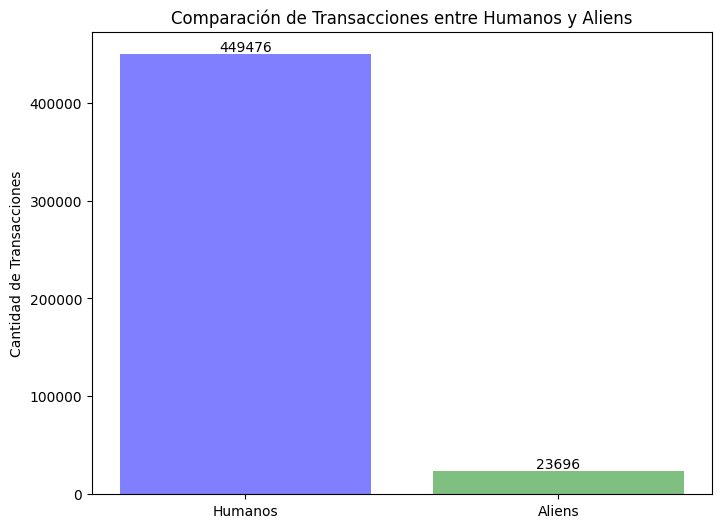

In [21]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame de pandas para humanos y aliens
df_humanos = df_pandas[df_pandas["Is An Alien"] == 0]
df_aliens = df_pandas[df_pandas["Is An Alien"] == 1]

# Calcular la cantidad de transacciones por humano y alien
transacciones_humanos = df_humanos.shape[0]  # Número de filas en el DataFrame de humanos
transacciones_aliens = df_aliens.shape[0]    # Número de filas en el DataFrame de aliens

# Preparar los datos para el gráfico de barras
categorias = ['Humanos', 'Aliens']
cantidad_transacciones = [transacciones_humanos, transacciones_aliens]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, cantidad_transacciones, color=['blue', 'green'], alpha=0.5)

# Agregar etiquetas a las barras
for i, valor in enumerate(cantidad_transacciones):
    plt.text(i, valor + 0.05, str(valor), ha='center', va='bottom')

plt.title('Comparación de Transacciones entre Humanos y Aliens')
plt.ylabel('Cantidad de Transacciones')
plt.show()


En este grafico se observa que la cantidad total de transacciones es liderada por los humanos ya que tienen un total de 449476 transacciones versus los aliens que solo tienen 23696

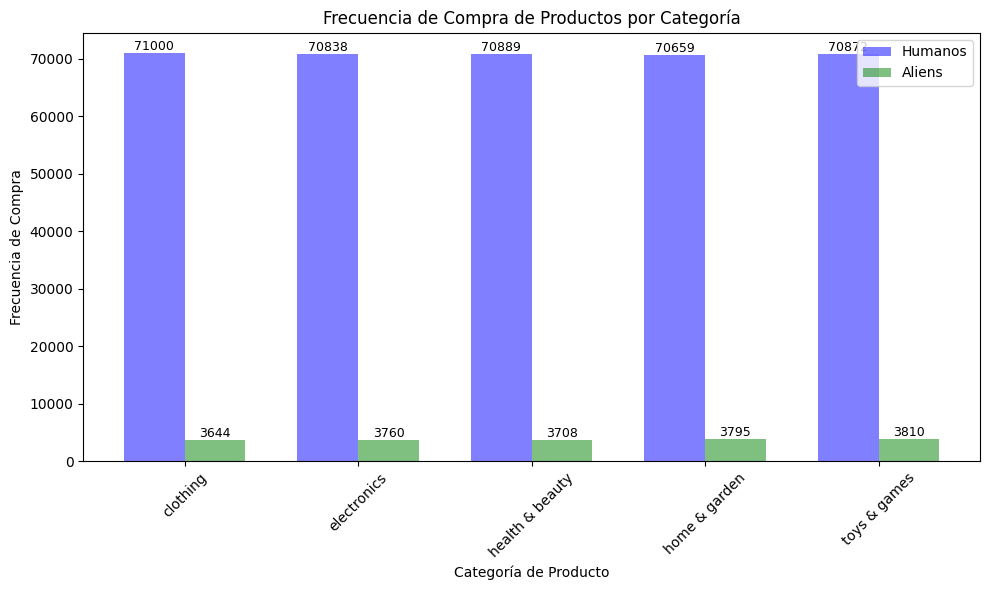

In [22]:
import numpy as np

# Calcular la frecuencia de compra de productos por categoría para humanos
frecuencia_humanos = df_pandas[df_pandas["Is An Alien"] == 0].groupby("Product Category").size().reset_index(name="count")

# Calcular la frecuencia de compra de productos por categoría para aliens
frecuencia_aliens = df_pandas[df_pandas["Is An Alien"] == 1].groupby("Product Category").size().reset_index(name="count")

# Preparar los datos para el gráfico de barras
categorias = frecuencia_humanos["Product Category"]
indice = np.arange(len(categorias))
ancho_barra = 0.35

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras_humanos = plt.bar(indice - ancho_barra/2, frecuencia_humanos["count"], width=ancho_barra, label='Humanos', color='blue', alpha=0.5)
barras_aliens = plt.bar(indice + ancho_barra/2, frecuencia_aliens["count"], width=ancho_barra, label='Aliens', color='green', alpha=0.5)
plt.xlabel('Categoría de Producto')
plt.ylabel('Frecuencia de Compra')
plt.title('Frecuencia de Compra de Productos por Categoría')
plt.xticks(indice, categorias, rotation=45)
plt.legend()

# Agregar etiquetas con los montos de las barras
for barra in barras_humanos:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, altura, '%d' % int(altura), ha='center', va='bottom', color='black', fontsize=9)

for barra in barras_aliens:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, altura, '%d' % int(altura), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

En este gráfico se observa las frecuencias de compras hitoricas por categoría, se observa que la diferencia en cantidad de compras entre humanos y aliens coincide con las proporciones vistas en el gráfico anterior y además se observa que las 5 categorias estan bien balanceadas

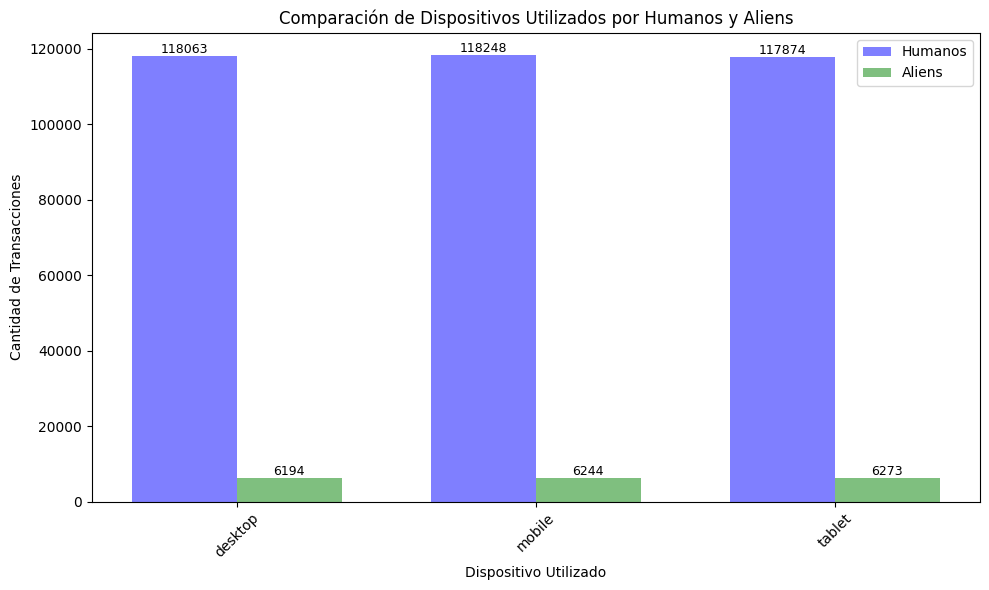

In [23]:

# Contar la cantidad de transacciones por dispositivo para humanos
transacciones_por_dispositivo_humanos = df_pandas[df_pandas["Is An Alien"] == 0].groupby("Device Used").size().reset_index(name="count")

# Contar la cantidad de transacciones por dispositivo para aliens
transacciones_por_dispositivo_aliens = df_pandas[df_pandas["Is An Alien"] == 1].groupby("Device Used").size().reset_index(name="count")

# Preparar los datos para el gráfico de barras
dispositivos = transacciones_por_dispositivo_humanos["Device Used"]
indice = np.arange(len(dispositivos))
ancho_barra = 0.35

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras_humanos = plt.bar(indice - ancho_barra/2, transacciones_por_dispositivo_humanos["count"], width=ancho_barra, label='Humanos', color='blue', alpha=0.5)
barras_aliens = plt.bar(indice + ancho_barra/2, transacciones_por_dispositivo_aliens["count"], width=ancho_barra, label='Aliens', color='green', alpha=0.5)
plt.xlabel('Dispositivo Utilizado')
plt.ylabel('Cantidad de Transacciones')
plt.title('Comparación de Dispositivos Utilizados por Humanos y Aliens')
plt.xticks(indice, dispositivos, rotation=45)
plt.legend()

# Agregar etiquetas con los montos de las barras
for barra in barras_humanos:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, altura, '%d' % int(altura), ha='center', va='bottom', color='black', fontsize=9)

for barra in barras_aliens:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, altura, '%d' % int(altura), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


En este gráfico se observa la cantidad de transacciones por dispositivo para humanos y aliens, al igual que los gráficos anteriores, la diferencia en proporcion de transacciones entre especies se mantiene y nuevamente las clases estan balanceadas

# Visualizacion de variables numéricas


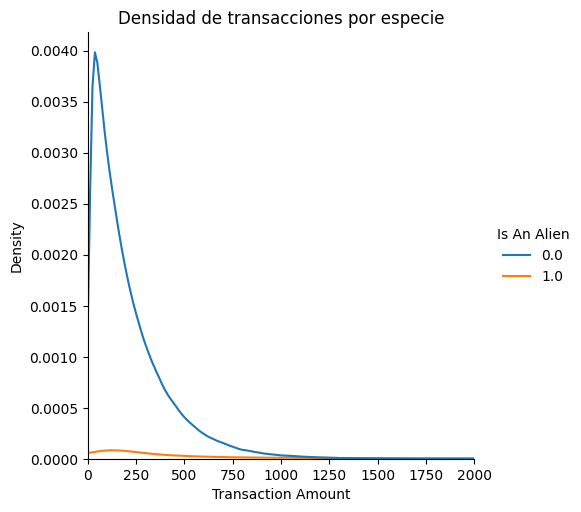

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer los límites en el eje x
xlim = (0, 2000)

# Crear el displot
densidad_monto_transaccion = sns.displot(data=df_pandas, x="Transaction Amount", hue="Is An Alien", kind="kde")

# Establecer el límite en el eje x
densidad_monto_transaccion.set(xlim=xlim)

# Establecer el título del gráfico
plt.title('Densidad de transacciones por especie')

# Mostrar el gráfico
plt.show()



En esta visualizacion observamos la densidad de compras por el monto de trasacción, esto quiere decir, la cantidad de datos por monto de compra, observamos que la mayoría de las compras es de un monto de 250 tanto para humanos como para aliens

Para esta visualización se limito el monto de compra a 2000 para poder tener una mejor perspectiva ya que después la densidad de compras tiende a 0

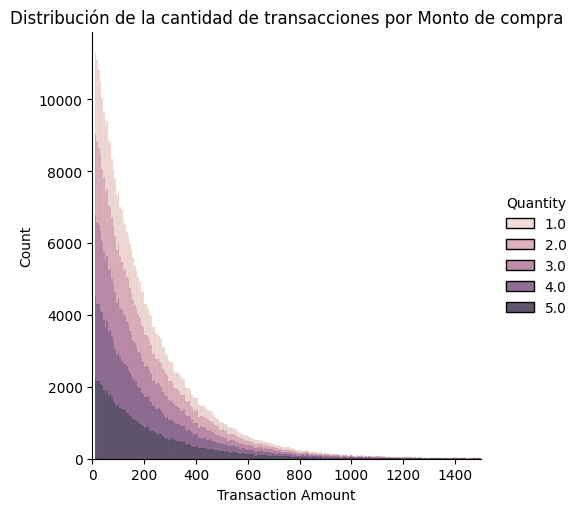

In [25]:
xlim = (0, 1500)

# Crear el displot
g = sns.displot(data=df_pandas, x="Transaction Amount", hue="Quantity", multiple="stack")

# Establecer el límite en el eje x
g.set(xlim=xlim)


plt.title('Distribución de la cantidad de transacciones por Monto de compra')
# Mostrar el gráfico
plt.show()

En esta visualizacion observamos la distribucion de transacciones por el monto de compra por cantidad de compras del usuario, al igua l qye el anterior se observa que la mayor cantidad de compra para los 5 grupos en relacion al monto de transacción se centra alrededor de los 150 ya que en este rango el ancho de los grupos es mayor.

Para esta visualización se limito el monto de compra a 2500 para poder tener una mejor perspectiva ya que después las compras tienden a 0

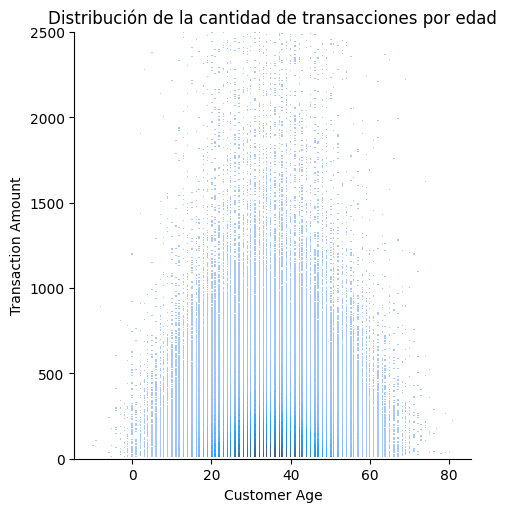

In [26]:
ylim = (0, 2500)

# Crear el displot
Trnasaction_per_age = sns.displot(data=df_pandas, x="Customer Age", y="Transaction Amount")

# Establecer el límite en el eje x
Trnasaction_per_age.set(ylim=ylim)

plt.title('Distribución de la cantidad de transacciones por edad')
# Mostrar el gráfico
plt.show()




En este grafico podemos observar la cantidad de compras por monto por edad de clientes y podemos observar que la mayoria de las compras son hechas por clientes entre 20 y 50 años cteniendo como monto maximo (sin considerar a los outliers que generan unalinea muy discontinua) esta entre los 1000 y 1500

#Analisis de patrones

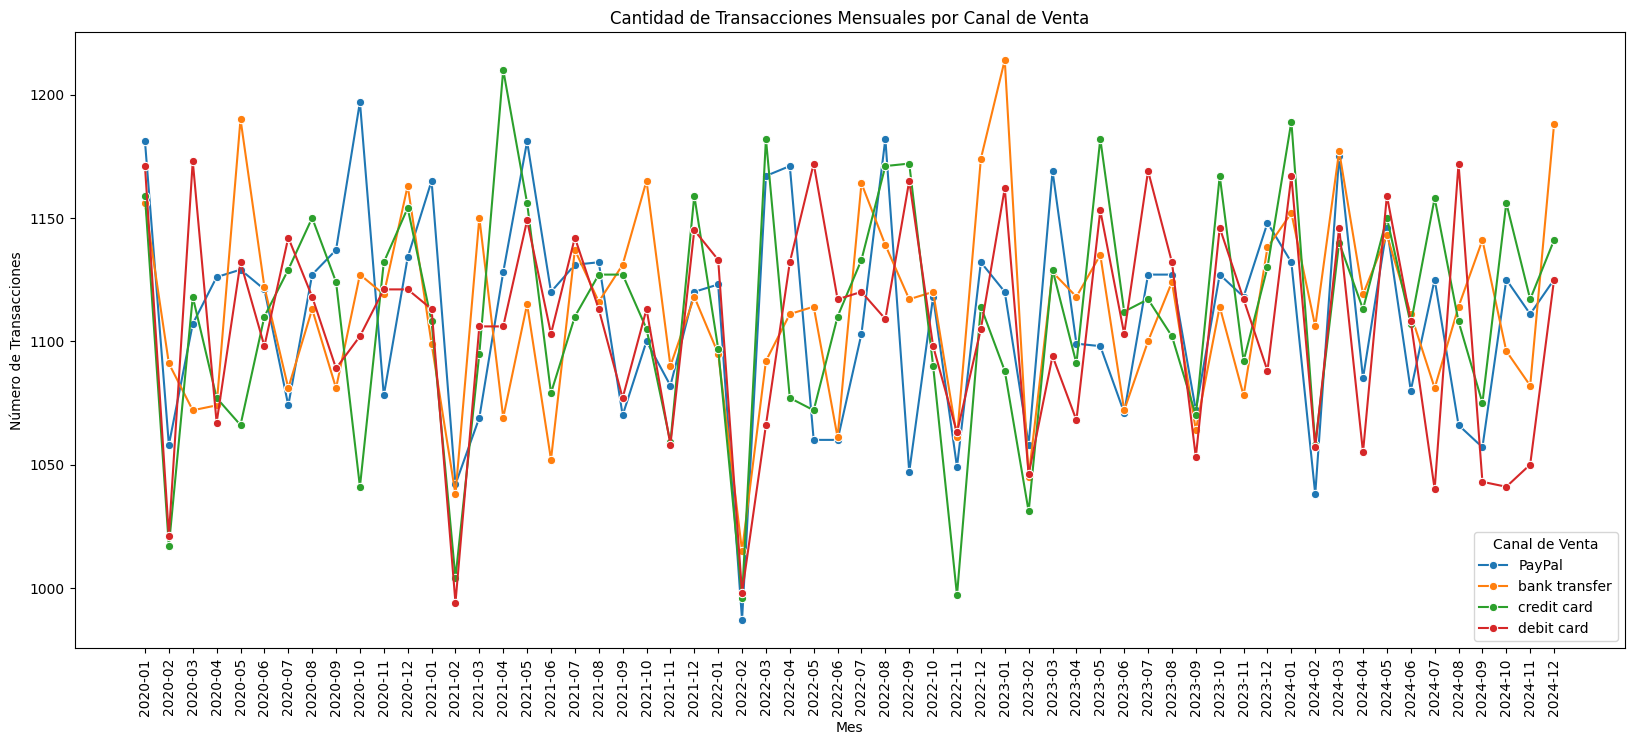

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la fecha a cadena en el formato deseado para el eje x
df_pandas["Transaction Month"] = df_pandas["Transaction Date"].dt.strftime('%Y-%m')

# Agrupar los datos por mes y método de pago, y contar las transacciones en cada grupo
transacciones_por_mes_y_metodo = df_pandas.groupby(["Transaction Month", "Payment Method"]).size().reset_index(name="Cantidad")

# Crear el lineplot
plt.figure(figsize=(20, 8))
sns.lineplot(data=transacciones_por_mes_y_metodo, x="Transaction Month", y="Cantidad", hue="Payment Method", marker="o")
plt.title('Cantidad de Transacciones Mensuales por Canal de Venta')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=90)
plt.legend(title="Canal de Venta")
plt.show()



En este gráfico se ve el numero de transacciones realizada por los distintos medios de pago a través del tiempo, se esperaba enconrar una tendencia de uso clara para al menos uno de los medios de pago, pero como se observa que no hay tendencias claras.

<ipython-input-40-b00e6bc266d7>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_productos_por_mes, x="Transaction Month", y="Cantidad", hue="Product Category", ci=None, dodge=False)


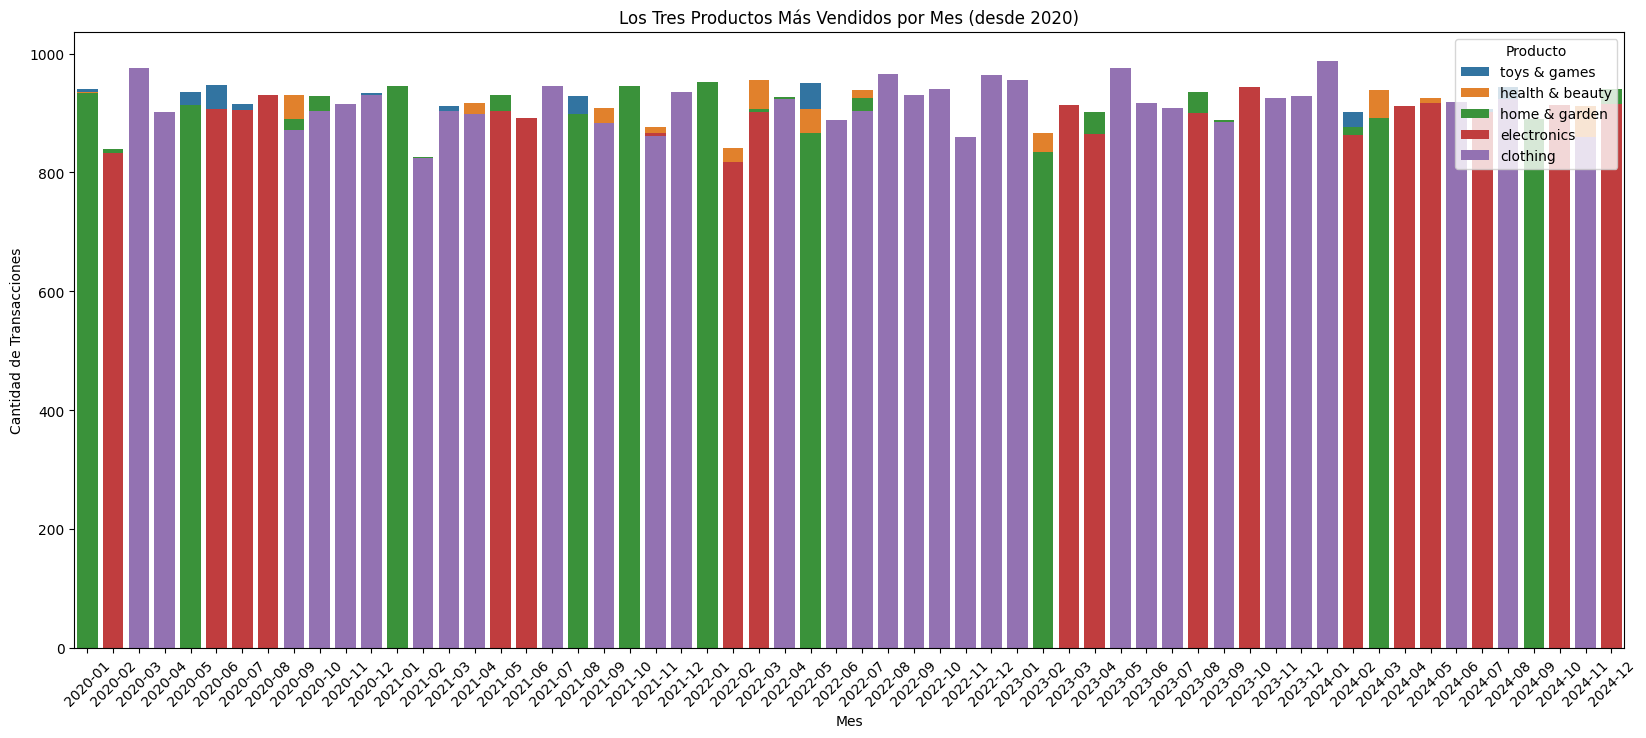

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos desde el año 2020
df_pandas = df_pandas[df_pandas["Transaction Date"].dt.year >= 2020]

# Convertir la fecha a cadena en el formato deseado para el eje x
df_pandas["Transaction Month"] = df_pandas["Transaction Date"].dt.strftime('%Y-%m')

# Agrupar los datos por mes y producto, y contar las transacciones de cada producto en cada mes
transacciones_por_mes_y_producto = df_pandas.groupby(["Transaction Month", "Product Category"]).size().reset_index(name="Cantidad")

# Encontrar los tres productos más vendidos en cada mes
top_productos_por_mes = transacciones_por_mes_y_producto.groupby("Transaction Month").apply(lambda x: x.nlargest(3, "Cantidad")).reset_index(drop=True)

# Crear el gráfico de barras apilado
plt.figure(figsize=(20, 8))
sns.barplot(data=top_productos_por_mes, x="Transaction Month", y="Cantidad", hue="Product Category", ci=None, dodge=False)
plt.title('Los Tres Productos Más Vendidos por Mes (desde 2020)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.legend(title="Producto")
plt.show()


En esta visualización se observan la cantidad de transacciones mensuales por categoria en una modalidad de barras apiladas desde el 2020 hasta diciembre del 2024, donde se observa que la categoria con más transacciones en este periodo de tiempo es "Clothing" seguida de "Electronics" y "Home & garden" sin una tendencia temporal clara

<Figure size 2000x800 with 0 Axes>

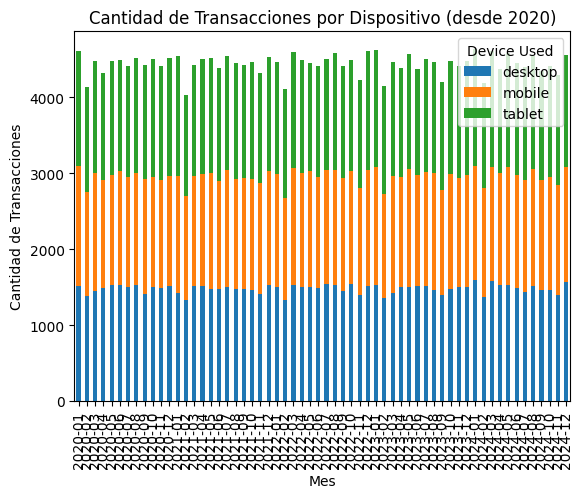

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos desde el año 2020
df_pandas = df_pandas[df_pandas["Transaction Date"].dt.year >= 2020]

# Convertir la fecha a cadena en el formato deseado para el eje x
df_pandas["Transaction Month"] = df_pandas["Transaction Date"].dt.strftime('%Y-%m')

# Agrupar los datos por mes y dispositivo, y contar las transacciones
transacciones_por_mes_y_dispositivo = df_pandas.groupby(["Transaction Month", "Device Used"]).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(20, 8))
transacciones_por_mes_y_dispositivo.plot(kind='bar', stacked=True)
plt.title('Cantidad de Transacciones por Dispositivo (desde 2020)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=90)
plt.legend(title="Device Used")
plt.show()





En esta visualización se observan la cantidad de transacciones mensuales por dispositivo usado en una modalidad de barras apiladas desde el 2020 hasta diciembre del 2024, donde se observa que los 3 dispositivos tienen una tendecia balanceada a traves del tiempo sin patrones evidentes

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



#Creacion de tabla de PySpark

In [30]:
from pyspark.sql import SparkSession

# Crear una SparkSession
spark = SparkSession.builder \
    .appName("Crear Tabla PySpark") \
    .getOrCreate()

# Nombre de la nueva tabla
nombre_tabla = "nueva_transacciones_partitioned_v2"

# Guardar el DataFrame como tabla particionada por 'Device Used'
df.write.partitionBy("Device Used").option("maxRecordsPerFile", 1000).mode("overwrite").saveAsTable(nombre_tabla)

# Detener la sesión de Spark al finalizar
spark.stop()




#Consulta de los 10 clientes que más productos han comprado en SQL
```
SELECT CustomerID, SUM(Quantity) AS Total_Productos_Comprados
FROM transacciones
GROUP BY CustomerID
ORDER BY Total_Productos_Comprados DESC
LIMIT 10;
```



In [31]:
!pip install pandasql

import pandas as pd
from pandasql import sqldf

# Definir el DataFrame de transacciones
transacciones = df_pandas

# Definir la función sqldf
pysqldf = lambda q: sqldf(q, globals())

# Ejecutar la consulta SQL
query = """
    SELECT "Customer ID", SUM(Quantity) AS Total_Productos_Comprados
    FROM transacciones
    GROUP BY "Customer ID"
    ORDER BY Total_Productos_Comprados DESC
    LIMIT 10;
"""

resultado = pysqldf(query)

print(resultado)




  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=b2b7ccda8aad4cf63e94ea1a67a9b144f904d558e44f417c5197737bdde47852
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
                            Customer ID  Total_Productos_Comprados
0                                  None                   169341.0
1  ffff3d77-a2d8-404b-94a9-dbf501650691                        5.0
2  fffd2b04-826d-43bc-b353-9f116db4ea29                        5.0
3  fffd13b6-70f3-4017-889c-9cd3ac7fb8ad                        5.0
4  fffc3506-3b84-419b-89ab-ec771fbe79d1                        5.0
5  fffb289f-9a9c-42b9-89d2-f32f9d0cfcf3                        5.0
6  fffaab2a-56e4-450f-8514-ebcf514fa5b0                        5.0
7  fffa51e2-881d-4bf4-94f8-c1995d86dbf9                        5.0
8  fff9291f-9178-451a-82af-39047760d05d                        5.0


Implementacio de la funcion ventana en SQL y su equivalente en PySpark                    

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Si hay un contexto de Spark existente, detenerlo
try:
    spark.stop()
except NameError:
    pass

# Crear una nueva sesión de Spark
spark = SparkSession.builder \
    .appName("Consultas SQL con PySpark v2") \
    .getOrCreate()

# Cargar el DataFrame de transacciones
transacciones = df

# Calcular la cantidad total de productos comprados por cliente
total_productos_comprados = transacciones.groupBy("Customer ID") \
    .agg(F.sum("Quantity").alias("Total_Productos_Comprados")) \
    .orderBy(F.col("Total_Productos_Comprados").desc()) \
    .limit(10)

# Mostrar el resultado
total_productos_comprados.show()

# Detener la sesión de Spark al finalizar
spark.stop()





Py4JJavaError: An error occurred while calling o291.showString.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:750)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:750)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2707)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.$anonfun$apply$1(CoalesceShufflePartitions.scala:61)
	at scala.runtime.java8.JFunction0$mcI$sp.apply(JFunction0$mcI$sp.java:23)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:58)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:34)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$optimizeQueryStage$2(AdaptiveSparkPlanExec.scala:169)
	at scala.collection.LinearSeqOptimized.foldLeft(LinearSeqOptimized.scala:126)
	at scala.collection.LinearSeqOptimized.foldLeft$(LinearSeqOptimized.scala:122)
	at scala.collection.immutable.List.foldLeft(List.scala:91)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.optimizeQueryStage(AdaptiveSparkPlanExec.scala:168)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.newQueryStage(AdaptiveSparkPlanExec.scala:588)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:538)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$createQueryStages$2(AdaptiveSparkPlanExec.scala:577)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.AbstractTraversable.map(Traversable.scala:108)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:577)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$createQueryStages$2(AdaptiveSparkPlanExec.scala:577)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.AbstractTraversable.map(Traversable.scala:108)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:577)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:277)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:272)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:417)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Convertir la columna "Transaction Date" a formato de fecha
transacciones = transacciones.withColumn("Transaction Date", F.to_date("Transaction Date"))

# Definir la ventana de los últimos tres meses
windowSpec = Window.partitionBy("Customer ID").orderBy(F.col("Transaction Date").desc()).rangeBetween(-90*86400, Window.currentRow)

# Calcular la compra más alta realizada por cada usuario en los últimos tres meses
resultado = transacciones.withColumn("MaxPurchaseLast3Months", F.max("Transaction Amount").over(windowSpec))

# Seleccionar las columnas necesarias
resultado = resultado.select("Customer ID", "Transaction Amount", "MaxPurchaseLast3Months")

# Mostrar el resultado
resultado.show()






### 6. UDF [10 puntos]
(2 por pregunta)

In [33]:

import requests
import pickle
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Descargar el archivo serializado
url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl"
response = requests.get(url)
modelo_serializado = pickle.loads(response.content)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [34]:
# Definir la función personalizada para aplicar el modelo
def custom_function(amount, quantity, age, hour):
    # Aplicar el modelo serializado a las características proporcionadas
    probabilidad_fraude = modelo_serializado.predict_proba([[amount, quantity, age, hour]])[:, 1]
    return float(probabilidad_fraude[0])  # Convertir a float y devolver la probabilidad de fraude

# Crear la UDF
udf_function = udf(custom_function, FloatType())

In [35]:
# Utilizar dir para listar los atributos y métodos del objeto
print(dir(modelo_serializado))

# Utilizar help para obtener información detallada sobre el método predict_proba
help(modelo_serializado.predict_proba)



['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params',


El método predict_proba del objeto modelo_serializado es el que nos interesa. Este método se utiliza para obtener las probabilidades de pertenencia a cada clase en un modelo de clasificación.

In [36]:
def predict_fraud_probability(modelo_serializado, datos_de_entrada):
    # Obtener las probabilidades de pertenencia a cada clase
    probabilidades = modelo_serializado.predict_proba(datos_de_entrada)
    # Extraer el último valor de la lista de probabilidades
    probabilidad_fraude = probabilidades[:, -1]
    # Devolver la probabilidad de fraude
    return float(probabilidad_fraude)

In [37]:
udf_predict_fraud_probability = udf(lambda x: predict_fraud_probability(modelo_serializado, x), FloatType())

In [38]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

from pyspark.sql.functions import col

# Crear una nueva columna "prediction" aplicando la función UDF a las columnas relevantes
df_with_prediction = df.withColumn("prediction", udf_predict_fraud_probability(col("Transaction Amount"),
                                                                             col("Quantity"),
                                                                             col("Customer Age"),
                                                                             col("Transaction Hour")))

# Mostrar un ejemplo de cómo se aplica la función UDF
df_with_prediction.select("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour", "prediction").show(5)




Py4JJavaError: An error occurred while calling o320.showString.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:750)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:750)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.broadcastInternal(SparkContext.scala:1659)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1644)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.buildReaderWithPartitionValues(ParquetFileFormat.scala:163)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:548)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:537)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecuteColumnar(DataSourceScanExec.scala:587)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeColumnar$1(SparkPlan.scala:222)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.executeColumnar(SparkPlan.scala:218)
	at org.apache.spark.sql.execution.InputAdapter.doExecuteColumnar(WholeStageCodegenExec.scala:521)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeColumnar$1(SparkPlan.scala:222)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.executeColumnar(SparkPlan.scala:218)
	at org.apache.spark.sql.execution.ColumnarToRowExec.inputRDDs(Columnar.scala:204)
	at org.apache.spark.sql.execution.BaseLimitExec.inputRDDs(limit.scala:168)
	at org.apache.spark.sql.execution.BaseLimitExec.inputRDDs$(limit.scala:167)
	at org.apache.spark.sql.execution.LocalLimitExec.inputRDDs(limit.scala:208)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:751)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.python.EvalPythonExec.doExecute(EvalPythonExec.scala:88)
	at org.apache.spark.sql.execution.python.EvalPythonExec.doExecute$(EvalPythonExec.scala:87)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.doExecute(BatchEvalPythonExec.scala:34)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:527)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:455)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:454)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:498)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:51)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:751)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:364)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:498)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


Los beneficios de utilizar una UDF en Spark son:

**Procesamiento distribuido:** La función personalizada se ejecuta de forma distribuida en todo el DataFrame, lo que permite un procesamiento eficiente de grandes conjuntos de datos.

**Flexibilidad:** Permite aplicar funciones personalizadas a las columnas del DataFrame, lo que brinda flexibilidad para realizar cálculos específicos o aplicar modelos entrenados.

**Integración con Spark:** La función UDF se integra perfectamente con el ecosistema de Spark, lo que permite aprovechar todas las capacidades de procesamiento y optimización de Spark.